## Mounting Google Drive locally

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


##Import Package
- ML: tensorflow, keras
- Visualization: matplotlib.pyplot
- numpy -> loadtxt

In [0]:
c

Using TensorFlow backend.


##Load Data from Google Drive
[Numpy loadtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html)

Diabetes Data in Classroom folder

In [0]:
dataset = loadtxt('/content/drive/My Drive/heart_disease_data_raw.csv', delimiter = ',')
print(dataset[0])
dataset[0].size

[ 63.    1.    3.  145.  233.    1.    0.  150.    0.    2.3   0.    0.
   1.    1. ]


14

#Understanding data
[Heart Disease Data @ Kaggle](https://www.kaggle.com/ronitf/heart-disease-uci)

Input:
> 1. age
> 2. sex
> 3. chest pain type (4 values)
> 4. resting blood pressure
> 5. serum cholestoral in mg/dl
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved
> 9. exercise induced angina
> 10. oldpeak = ST depression induced by exercise relative to rest
> 11. the slope of the peak exercise ST segment
> 12. number of major vessels (0-3) colored by flourosopy
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defec

Output: 
> 0 = disease,
> 1 = no disease

#Split Data
 - Input: first 13 index, from index 0 - 12
 - Output: last 1 index, index 13

In [0]:
x = dataset[:, 0:13]
y = dataset[:, 13]

Check data splitting

In [0]:
x[1]

array([ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
         3.5,   0. ,   0. ,   2. ])

In [0]:
y[1]


1.0

#Build Model
How do we know number of layer and type of layers?
- Experimental, trail & error to find the best model architecture

Here is an example
- Input Dimension: The model expects rows of data with 13 variables (the input_dim=13 argument)
- Hidden layer (1st): 64 nodes and uses the tanh activation function. Need to specify your input dimension here
- Hidden layer (2nd): 64 nodes and uses the tanh activation function.
- Hidden layer (3rd): 32 nodes and use tanh activation function
- Output layer (last): 1 node and uses the sigmoid activation function.

In [0]:
def create_model():
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(12, input_dim =13, activation = 'relu'))#in
  model.add(tf.keras.layers.Dense(64, activation = 'tanh'))#h
  model.add(tf.keras.layers.Dense(64, activation = 'tanh'))#h
  model.add(tf.keras.layers.Dense(32, activation = 'tanh'))#h
  model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))#out
  return model

#Compile Model
[Keras Model Compile](https://keras.io/models/model/)

use model.summary()


Compiling model uses backend lib like Theano or Tensorflow.
- Loss Function: use to evaluate a set of weight

  [How to choose loss function](https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/)
- Optimizer: used to sesarch through different weights for the network and any optional metrics we would like to collect and report during training

  [Adam Optimization Algo](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/)

In [0]:
tf.keras.model = create_model()
tf.keras.model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
tf.keras.model.summary()


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 12)                168       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                832       
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 7,273
Trainable params: 7,273
Non-trainable params: 0
___________

#Train (fit) Model
[Keras Model.fit()](https://keras.rstudio.com/reference/fit.html)

- Epoch: 1 pass through all rows in training data set
- Batch: one or more samples considered by the model within an epoch before weights are updated
- Verbose: Verbosity mode (0 = silent, 1 = progress bar, 2 = one line per epoch).
- Validation_split: 	
Float between 0 and 1. Fraction of the training data to be used as validation data.

In [0]:
history = tf.keras.model.fit(x, y, epochs=150, batch_size=10,verbose=2,validation_split=0.5)

Train on 151 samples, validate on 152 samples
Epoch 1/150
151/151 - 0s - loss: 3.9917e-06 - acc: 1.0000 - val_loss: 11.2864 - val_acc: 0.0921
Epoch 2/150
151/151 - 0s - loss: 3.9596e-06 - acc: 1.0000 - val_loss: 11.2938 - val_acc: 0.0921
Epoch 3/150
151/151 - 0s - loss: 3.9278e-06 - acc: 1.0000 - val_loss: 11.3011 - val_acc: 0.0921
Epoch 4/150
151/151 - 0s - loss: 3.8962e-06 - acc: 1.0000 - val_loss: 11.3084 - val_acc: 0.0921
Epoch 5/150
151/151 - 0s - loss: 3.8648e-06 - acc: 1.0000 - val_loss: 11.3158 - val_acc: 0.0921
Epoch 6/150
151/151 - 0s - loss: 3.8338e-06 - acc: 1.0000 - val_loss: 11.3231 - val_acc: 0.0921
Epoch 7/150
151/151 - 0s - loss: 3.8029e-06 - acc: 1.0000 - val_loss: 11.3304 - val_acc: 0.0921
Epoch 8/150
151/151 - 0s - loss: 3.7725e-06 - acc: 1.0000 - val_loss: 11.3377 - val_acc: 0.0921
Epoch 9/150
151/151 - 0s - loss: 3.7422e-06 - acc: 1.0000 - val_loss: 11.3450 - val_acc: 0.0921
Epoch 10/150
151/151 - 0s - loss: 3.7121e-06 - acc: 1.0000 - val_loss: 11.3524 - val_acc: 

#Plot Training History
[Model Visualization](https://keras.io/visualization/#model-visualization)

Plot training & validation accuracy values

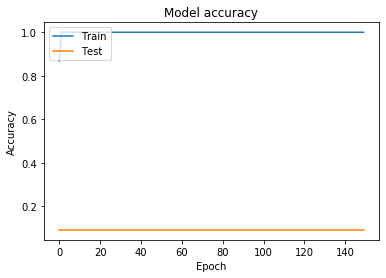

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#Evaluate Model
[Keras Evaluate Model](https://keras.io/models/model/#evaluate)

NameError: ignored

#Predict
[Keras Predic](https://keras.io/models/model/#predict)

Machine learnt how to diagnose diabetes, now let machine take the doctor's position

#Project Reference
[Kaggle -> UCI](https://www.kaggle.com/nozziel/heart-disease-uci-explainable-model-shap/notebook)